In [1]:
import numpy as np
import netCDF4 as nc
import numpy.ma as MA
import pylab as plt

In [2]:
#pressure data for defining areas
press_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')
press = press_data.variables['p'][:]

#field data
temp_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_temp.nc')
temp = temp_data.variables['temp']
zon_temp = np.mean(temp, axis=(0,3))[:25,:] #truncated at level 25

lat = press_data.variables['latitude'][:]
lon = press_data.variables['longitude'][:]
alt = press_data.variables['model_level_number'][:]

zon_press = np.mean(press, axis=(0,3))[:25,:]

Separate by pressure to get three different height sections

In [3]:
#get zones by pressure
height_1 = MA.masked_less(zon_press, 75000)
height_2 = MA.masked_outside(zon_press, 75000, 50000)
height_3 = MA.masked_outside(zon_press, 50000,25000)

Separate latitude sections

In [4]:
lat_array = np.array([lat] * 25)

sec_1 = MA.masked_greater(lat_array,-30)
sec_2 = MA.masked_outside(lat_array, -30, 0)
sec_3 = MA.masked_outside(lat_array, 0, 30)
sec_4 = MA.masked_less(lat_array, 30)

Make array of conditions defining each area

In [5]:
heights = [height_1.mask, height_2.mask, height_3.mask]
sections = [sec_1.mask, sec_2.mask, sec_3.mask, sec_4.mask]
conditions = []
for h in heights:
    for s in sections:
        conditions.append([h,s])
cond = np.asarray(conditions)
#print(cond.shape)
#print(cond[0,:,:,:])

In [7]:
#loop over conditions to get mean for each area
law_temps = np.empty((25,73))
mean_vals = []
for i in range(12):
    temp_values = MA.masked_where(np.logical_or(*cond[i,:,:,:]),zon_temp) #extract temp values in section
    mean = round(np.mean(temp_values),1) #get mean over this section
    mean_vals.append(mean)
    law_temps = np.where(temp_values.mask, law_temps, mean)

law_temps2 = MA.masked_where(zon_press < 25000, law_temps)
print(mean_vals)
print(mean_vals[0])

[270.1, 291.1, 292.9, 269.5, 248.5, 275.1, 275.4, 256.3, 227.2, 249.2, 248.8, 231.6]
270.1


Text(0.5, 1.0, 'Mean temperature by region')

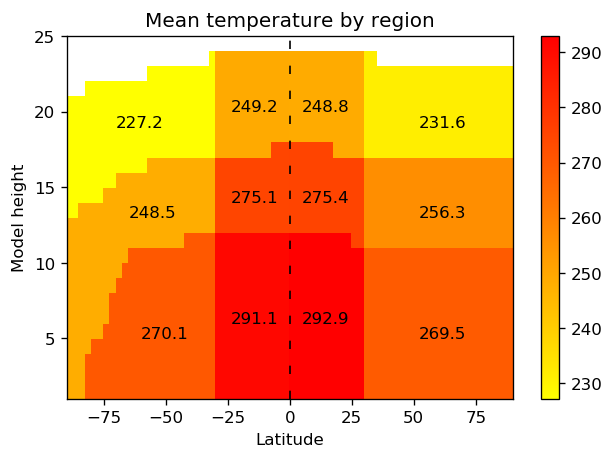

In [8]:
plt.figure(dpi=120)
plt.pcolormesh(lat,alt[:25],law_temps2,cmap='autumn_r')
plt.colorbar()

plt.text(-60,5,f'{mean_vals[0]}')
plt.text(-24,6,f'{mean_vals[1]}')
plt.text(5,6,f'{mean_vals[2]}')
plt.text(52,5,f'{mean_vals[3]}')
plt.text(-65,13,f'{mean_vals[4]}')
plt.text(-24,14,f'{mean_vals[5]}')
plt.text(5,14,f'{mean_vals[6]}')
plt.text(52,13,f'{mean_vals[7]}')
plt.text(-70,19,f'{mean_vals[8]}')
plt.text(-24,20,f'{mean_vals[9]}')
plt.text(5,20,f'{mean_vals[10]}')
plt.text(52,19,f'{mean_vals[11]}')
'''
#label pressures
plt.text(70,11,'750 hPa',fontsize=8.5, weight='bold')
plt.text(70,17,'500 hPa',fontsize=8.5, weight='bold')
plt.text(70,23,'250 hPa',fontsize=8.5, weight='bold')'''

plt.axvline(x=0, linewidth=1, linestyle=(0,(5,10)), color='k')
plt.xlabel('Latitude')
plt.ylabel('Model height')
plt.title('Mean temperature by region')

Text(0.5, 1.0, 'Mean temperature by region')

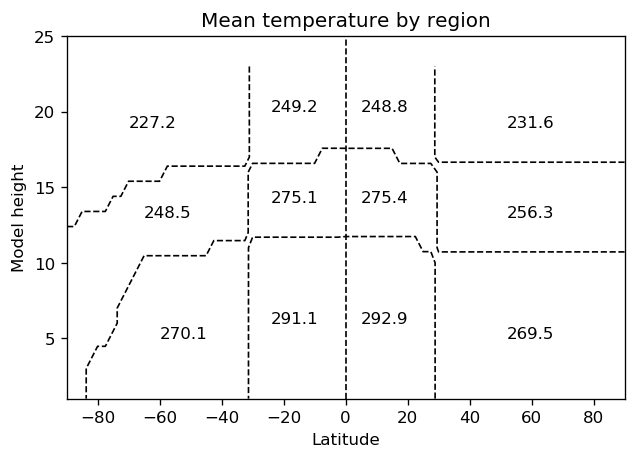

In [9]:
plt.figure(dpi=120)
plt.contour(lat,alt[:25],law_temps2,3, colors='k', linewidths=1, linestyles='dashed')

plt.text(-60,5,f'{mean_vals[0]}')
plt.text(-24,6,f'{mean_vals[1]}')
plt.text(5,6,f'{mean_vals[2]}')
plt.text(52,5,f'{mean_vals[3]}')
plt.text(-65,13,f'{mean_vals[4]}')
plt.text(-24,14,f'{mean_vals[5]}')
plt.text(5,14,f'{mean_vals[6]}')
plt.text(52,13,f'{mean_vals[7]}')
plt.text(-70,19,f'{mean_vals[8]}')
plt.text(-24,20,f'{mean_vals[9]}')
plt.text(5,20,f'{mean_vals[10]}')
plt.text(52,19,f'{mean_vals[11]}')

plt.axvline(x=0, linewidth=1, linestyle='dashed', color='k')
plt.xlabel('Latitude')
plt.ylabel('Model height')
plt.title('Mean temperature by region')

Text(0.5, 1.0, 'Temperature')

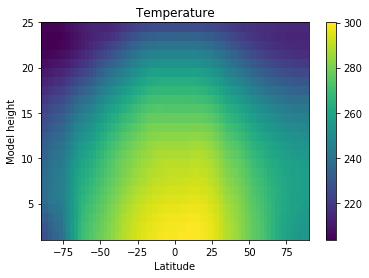

In [10]:
#for comparison
plt.pcolormesh(lat,alt[:25],zon_temp)
plt.colorbar()

plt.xlabel('Latitude')
plt.ylabel('Model height')
plt.title('Temperature')